In [1]:
import os
from osgeo import gdal
import matplotlib.pyplot as plt
import numpy as np
from osgeo import osr
os.chdir(r'./Desktop/TechMeet/ch2_tmc_ndn_20210518T1656115474_d_oth_d18/data/derived/20210518')

In [2]:
file_name = r'ch2_tmc_ndn_20210518T1656115474_d_oth_d18.tif'

In [3]:
ds = gdal.Open(file_name)
ds

<osgeo.gdal.Dataset; proxy of <Swig Object of type 'GDALDatasetShadow *' at 0x000001F5DD1CD380> >

In [4]:
print('File list:', ds.GetFileList())

File list: ['ch2_tmc_ndn_20210518T1656115474_d_oth_d18.tif']


In [5]:
print('Width:', ds.RasterXSize)

Width: 121176


In [6]:
print('Height:', ds.RasterYSize)

Height: 102684


In [7]:
gt = ds.GetGeoTransform()

In [8]:
print('Number of bands:', ds.RasterCount)

Number of bands: 1


In [9]:
band = ds.GetRasterBand(1)

In [10]:
data = band.ReadAsArray(xoff=10000, yoff=10000, win_xsize=1000, win_ysize=1000)

In [11]:
data.shape

(1000, 1000)

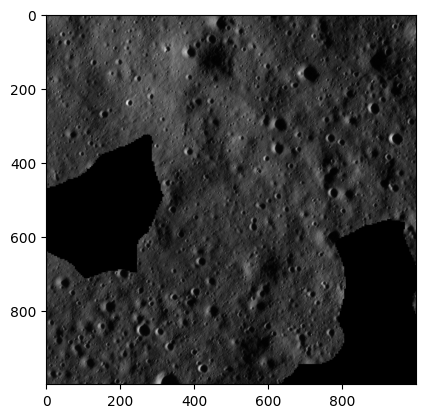

In [12]:
plt.imshow(data, cmap='gray')

In [13]:
del data
del ds

# Breaking a file in multiple small files

In [1]:
import os
from osgeo import gdal
import matplotlib.pyplot as plt
import numpy as np
from osgeo import osr
os.chdir(r'path to folder in which tiff file is present')

In [2]:
src_file = 'ch2_tmc_ndn_20210518T1656115474_d_oth_d18.tif'

In [3]:
driver = gdal.GetDriverByName('gtiff')

In [5]:
src_ds = gdal.Open(src_file)
gt = src_ds.GetGeoTransform()
band = src_ds.GetRasterBand(1)

In [6]:
x_size = src_ds.RasterXSize
y_size = src_ds.RasterYSize

In [7]:
#block_size_x, block_size_y = band.GetBlockSize()
block_size_x, block_size_y = 2376,2388

In [13]:
j=1
for x in range(0,x_size,block_size_x):
    if x+block_size_x < x_size:
        columns = block_size_x
    else:
        columns = x_size-x
    for y in range(0,y_size,block_size_y):
        if y + block_size_y < y_size:
            rows = block_size_y
        else:
            rows - y_size - y
        data = band.ReadAsArray(x,y,columns,rows)
        dst_ds = driver.Create('.\parts\sample'+str(j)+'.tif', xsize=columns, ysize=rows, bands=1, eType=gdal.GDT_UInt16)
        crs=osr.SpatialReference()
        crs.SetWellKnownGeogCS('WGS84')
        trf=[gdal.ApplyGeoTransform(gt,x,y)[0],gt[1],gt[2],gdal.ApplyGeoTransform(gt,x,y)[1],gt[4],gt[5]]
        dst_ds.SetProjection(crs.ExportToXML())
        dst_ds.SetGeoTransform(trf)
        out_band = dst_ds.GetRasterBand(1)
        out_band.WriteArray(data)
        dst_ds.FlushCache()
        out_band = None
        dst_ds = None
        j+=1

In [14]:
band = None
src_ds = None

In [ ]:
for i in range(1,2194):
    file_name = '.\parts\sample' + str(i) + '.tif'
    ds1 = gdal.Open(file_name)
    band = ds1.GetRasterBand(1)
    data = band.ReadAsArray()
    plt.imsave('.\graphs\s'+str(i)+'.png', data, cmap='gray')
    band = None
    ds1 = None

File list: ['.\\parts\\sample133.tif']
Width: 2376
Height: 2388
Coordinate System: 
(-237378.75, 5.0, 0.0, 184545.578125, 0.0, -5.0)
Origin: (-237378.75, 184545.578125)
Pixel Size: (5.0, -5.0)
Upper Left Corner: [-237378.75, 184545.578125]
Upper Right Corner: [-225498.75, 184545.578125]
Lower Left Corner: [-237378.75, 172605.578125]
Lower Right Corner: [-225498.75, 172605.578125]
Centre: [-231438.75, 172605.578125]
Metadata: {}
Image Structure Metadata: {'INTERLEAVE': 'BAND'}
Number of bands: 1
Band1, min=0.000, max=248.000, mean=29.379, stddev=26.644


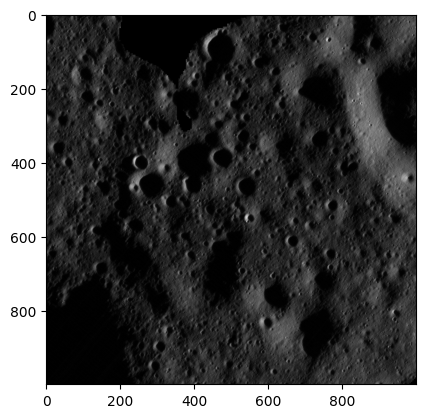

In [23]:
file_name = r'.\parts\sample133.tif'
ds1 = gdal.Open(file_name)
ds1
print('File list:', ds1.GetFileList())
print('Width:', ds1.RasterXSize)
print('Height:', ds1.RasterYSize)
print('Coordinate System:', ds1.GetProjection())
gt = ds1.GetGeoTransform()
print(gt)
print('Origin:', (gt[0],gt[3]))
print('Pixel Size:', (gt[1],gt[5]))
print('Upper Left Corner:', gdal.ApplyGeoTransform(gt,0,0))
print('Upper Right Corner:', gdal.ApplyGeoTransform(gt,ds1.RasterXSize,0))
print('Lower Left Corner:', gdal.ApplyGeoTransform(gt,0,ds1.RasterYSize))
print('Lower Right Corner:', gdal.ApplyGeoTransform(gt,ds1.RasterXSize,ds1.RasterYSize))
print('Centre:', gdal.ApplyGeoTransform(gt,ds1.RasterXSize/2,ds1.RasterYSize))
print('Metadata:', ds1.GetMetadata())
print('Image Structure Metadata:', ds1.GetMetadata('IMAGE_STRUCTURE'))
print('Number of bands:', ds1.RasterCount)
for i in range(1, ds1.RasterCount+1):
    band = ds1.GetRasterBand(i)
    (minimum, maximum, mean, stddev) = band.ComputeStatistics(False)
    print('Band{:d}, min={:.3f}, max={:.3f}, mean={:.3f}, stddev={:.3f}'.format(i, minimum, maximum, mean, stddev))
band = ds1.GetRasterBand(1)
data = band.ReadAsArray(xoff=0, yoff=0, win_xsize=1000, win_ysize=1000)
plt.imshow(data, cmap='gray')
plt.show()
band = None
src_ds = None